# Линейная Алгебра

# Сингулярное разложение матриц

In [133]:
import numpy as np
from numpy.linalg import norm
from numpy.linalg import svd
np.set_printoptions(precision=2, suppress=True)

1. Найти с помощью NumPy SVD для матрицы

$$\begin{pmatrix}
1 & 2 & 0\\ 
0 & 0 & 5\\ 
3 & -4 & 2\\ 
1 & 6 & 5\\ 
0 & 1 & 0
\end{pmatrix}.$$


2. Для матрицы из предыдущего задания найти:

    а) евклидову норму;
    
    б) норму Фробениуса.

In [49]:
A = np.array([
    [1,2,0],
    [0,0,5],
    [3,-4,2],
    [1,6,5],
    [0,1,0]
])

In [50]:
U, s, W = np.linalg.svd(A)

V = W.T
print(f'U:\n{U}\n')
print(f's:\n{s}\n')
print(f'Матрица V^T:\n{W}\n')
print(f'Матрица V:\n{V}')

U:
[[ 0.17  0.16 -0.53 -0.8  -0.16]
 [ 0.39 -0.53  0.61 -0.43  0.03]
 [-0.14 -0.82 -0.52  0.14  0.07]
 [ 0.89  0.06 -0.25  0.38 -0.06]
 [ 0.08  0.11 -0.08 -0.11  0.98]]

s:
[8.82 6.14 2.53]

Матрица V^T:
[[ 0.07  0.72  0.69]
 [-0.37  0.67 -0.65]
 [-0.93 -0.21  0.31]]

Матрица V:
[[ 0.07 -0.37 -0.93]
 [ 0.72  0.67 -0.21]
 [ 0.69 -0.65  0.31]]


In [51]:
D = np.zeros_like(A, dtype=float)
D[np.diag_indices(min(A.shape))] = s
print(f'Матрица D:\n{D}')

Матрица D:
[[8.82 0.   0.  ]
 [0.   6.14 0.  ]
 [0.   0.   2.53]
 [0.   0.   0.  ]
 [0.   0.   0.  ]]


In [52]:
# Проверка
print(np.dot(np.dot(U, D), V.T))

[[ 1.  2.  0.]
 [ 0. -0.  5.]
 [ 3. -4.  2.]
 [ 1.  6.  5.]
 [-0.  1.  0.]]


In [31]:
print(norm.__doc__)


    Matrix or vector norm.

    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.

    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object.
    axis : {int, 2-tuple of ints, None}, optional
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these matrices
        are computed.  If `axis` is None then either a vector norm (when `x`
        is 1-D) or a matrix norm (when `x` is 2-D) is returned.

        .. versionadded:: 1.8.0

    keepdims : bool, optional
        If this is set 

In [25]:
print(np.dot(V.T, V))

[[ 1.00000000e+00  1.23328062e-16  1.61457700e-17]
 [ 1.23328062e-16  1.00000000e+00 -2.21158540e-17]
 [ 1.61457700e-17 -2.21158540e-17  1.00000000e+00]]


In [34]:
print(f'Евклидова (l2 норма) матрицы А:\n{norm(A, ord=2)}')

Евклидова (l2 норма) матрицы А:
8.824868854820444


In [46]:
A_fro = norm(A) # Также norm(A,'fro')
print(f'Норма Фробениуса матрицы А:\n{A_fro}')

Норма Фробениуса матрицы А:
11.045361017187261


# SVD обработка изображения

In [270]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
from ipywidgets import interact,interactive,interact_manual

In [249]:
image = mpimg.imread('python.jpg')
img = np.array(image) # делает массив редактируемым

In [250]:
print(f'img type:{type(img)}')
print(f'img size:{img.shape}')

img type:<class 'numpy.ndarray'>
img size:(600, 1080, 3)


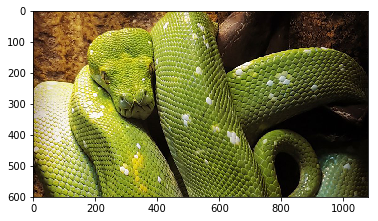

In [374]:
plt.imshow(img)
plt.show()

In [286]:
n_img = rgb2gray(img_as_float(img))
print(f'img type:{type(n_img)}')
print(f'img size:{n_img.shape}')

img type:<class 'numpy.ndarray'>
img size:(600, 1080)


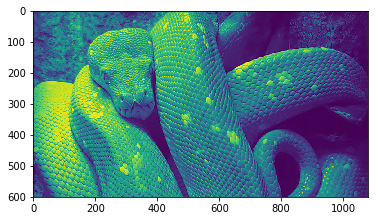

In [287]:
plt.imshow(n_img)
plt.show()

In [288]:
n_img

array([[0.19, 0.18, 0.17, ..., 0.04, 0.04, 0.05],
       [0.2 , 0.19, 0.18, ..., 0.03, 0.05, 0.08],
       [0.21, 0.19, 0.18, ..., 0.01, 0.05, 0.09],
       ...,
       [0.24, 0.24, 0.24, ..., 0.08, 0.09, 0.08],
       [0.22, 0.23, 0.23, ..., 0.08, 0.08, 0.08],
       [0.16, 0.18, 0.22, ..., 0.08, 0.08, 0.08]])

##### Использование SVD для сжатия изображения:

In [323]:
def compress_svd(image, k): # Параметр k задает степень сжатия
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix,s

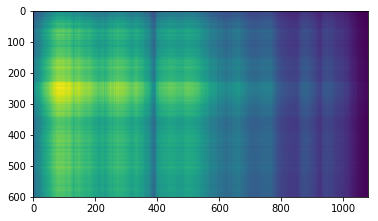

In [352]:
img2, s = compress_svd(n_img,1)
plt.imshow(img2)
plt.show()

In [355]:
def show_compressed_img(k): # 
    """
     compresses gray scale images and display the reconstructed image.
     Also displays a plot of singular values
    """
    image=n_img
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(12,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img, cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

In [356]:
interact(show_compressed_img,k=(1,50));

interactive(children=(IntSlider(value=25, description='k', max=50, min=1), Output()), _dom_classes=('widget-in…